
<font size="50" color="lighblue">CURSO AI - CAPSTONE</font>

<font size="6" color="blue">EQUIPO SAGE SEARCH </font>


# Cargue de Datos

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.4 MB/s eta 0:00:00


In [ ]:
# Importación de librerías y paquetes

import pandas as pd                # Librería para manipulación y análisis de datos
import numpy as np                 # Librería para operaciones matemáticas y manejo de arrays
#import requests                    # Librería para realizar solicitudes HTTP
import matplotlib.pyplot as plt    # Librería para crear gráficos y visualizaciones
import seaborn as sns              # Librería para visualización de datos basada en matplotlib

from sklearn.feature_extraction.text import TfidfVectorizer  # Para convertir texto en una matriz de características TF-IDF
from sklearn.metrics.pairwise import cosine_similarity       # Para calcular la similitud coseno entre vectores

from google.colab import drive    # Para montar Google Drive en Google Colab y acceder a los archivos almacenados allí

from sklearn.model_selection import train_test_split   # Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.svm import SVC                            # Soporte vectorial para clasificación

import re  # Librería para trabajar con expresiones regulares

from sklearn.metrics import classification_report  # Para generar un reporte con métricas de clasificación

from sklearn.preprocessing import OneHotEncoder        # Para convertir variables categóricas en una representación de vectores
from sklearn.compose import ColumnTransformer          # Para aplicar transformaciones a columnas específicas
from sklearn.pipeline import Pipeline                  # Para crear un pipeline de procesamiento de datos y modelado

from sklearn.naive_bayes import MultinomialNB          # Clasificador Naive Bayes multimonial para datos discretos
from sklearn.metrics import mean_squared_error         # Para calcular el error cuadrático medio

#from flask import Flask, request, jsonify  # Para crear una aplicación web utilizando Flask

import joblib  # Para guardar y cargar modelos de machine learning

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score  # Métricas de evaluación de modelos

from unidecode import unidecode  # Para eliminar acentos y caracteres especiales del texto


drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definir los parámetros

# La URL base del conjunto de datos
base_url = 'https://www.datos.gov.co/resource/p6dx-8zbt.csv'
batch_size = 1000  # Número de filas por solicitud
total_rows = 5720272  # Total de filas a obtener
query = "$where=fecha_de_publicacion_del>'2022-01-01T00:00:00.000'"
dataframes = []  # Lista para almacenar los DataFrames
offset = 0  # Inicializar el desplazamiento

# Bucle para obtener todos los datos
while True:
    # Formar la URL con los parámetros necesarios
    url = f"{base_url}?{query}&$limit={batch_size}&$offset={offset}"
    print(f"Obteniendo filas desde {offset} hasta {offset + batch_size}")

    # Leer el lote de datos desde la URL
    df_batch = pd.read_csv(url, on_bad_lines='skip')
    dataframes.append(df_batch)  # Añadir el DataFrame del lote a la lista

    offset += batch_size  # Incrementar el desplazamiento para la próxima solicitud

    # Si el número de filas obtenidas es menor que el tamaño del lote, se ha alcanzado el final
    if len(df_batch) < batch_size:
        break

# Combinar todos los DataFrames en uno solo
df_all = pd.concat(dataframes, ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
print(df_all.head())
print(f"Total de filas obtenidas: {len(df_all)}")


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
Obteniendo filas desde 0 hasta 1000
Obteniendo filas desde 1000 hasta 2000
Obteniendo filas desde 2000 hasta 3000
Obteniendo filas desde 3000 hasta 4000
Obteniendo filas desde 4000 hasta 5000
Obteniendo filas desde 5000 hasta 6000
Obteniendo filas desde 6000 hasta 7000
Obteniendo filas desde 7000 hasta 8000
Obteniendo filas desde 8000 hasta 9000
Obteniendo filas desde 9000 hasta 10000
Obteniendo filas desde 10000 hasta 11000
Obteniendo filas desde 11000 hasta 12000
Obteniendo filas desde 12000 hasta 13000
Obteniendo filas desde 13000 hasta 14000
Obteniendo filas desde 14000 hasta 15000
Obteniendo filas desde 15000 hasta 16000
Obteniendo filas desde 16000 hasta 17000
Obteniendo filas desde 17000 hasta 18000
Obteniendo filas desde 18000 hasta 19000
Obteniendo filas desde 19000 hasta 20000
Obteniendo filas desde 20000 hasta 21000
Obteniendo filas desde 21000 hasta 22000
Obteniendo filas desde 22000 hasta 23000
Obteniendo fila

In [ ]:
# Guardar el DataFrame en un archivo CSV
df_all.to_csv('secopii_22_24.csv', index=False)

In [ ]:
# Medir el tiempo de ejecución
%time

# Ruta del archivo en Google Drive
file_path = 'secopii_22_24.csv'  # Reemplaza con la ruta correcta

# Leer el archivo CSV
df_all = pd.read_csv(file_path)

# Exploración inicial del DataFrame
print(df_all.head())  # Mostrar las primeras filas del DataFrame
print(df_all.info())  # Información general sobre el DataFrame, incluyendo tipos de datos y valores nulos


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


FileNotFoundError: [Errno 2] No such file or directory: 'secopii_22_24.csv'

In [ ]:
# Seleccionar columnas de interés
df = df_all[[
    "departamento_entidad",             # Departamento de la entidad
    "ciudad_entidad",                   # Ciudad de la entidad
    "ordenentidad",                     # Orden de la entidad
    "nombre_del_procedimiento",         # Nombre del procedimiento
    "descripci_n_del_procedimiento",    # Descripción del procedimiento
    "fase",                             # Fase del procedimiento
    "modalidad_de_contratacion",        # Modalidad de contratación
    "unidad_de_duracion",               # Unidad de duración del contrato
    "tipo_de_contrato",                 # Tipo de contrato
    "subtipo_de_contrato"               # Subtipo de contrato
]]


In [ ]:
# Describir cada columna
print(df.describe(include='all'))


              departamento_entidad ciudad_entidad ordenentidad  \
count                      3593567        3593567      3593567   
unique                          34            988            4   
top     Distrito Capital de Bogotá    No Definido  Territorial   
freq                       1047151         717842      2398150   
mean                           NaN            NaN          NaN   
std                            NaN            NaN          NaN   
min                            NaN            NaN          NaN   
25%                            NaN            NaN          NaN   
50%                            NaN            NaN          NaN   
75%                            NaN            NaN          NaN   
max                            NaN            NaN          NaN   

       nombre_del_procedimiento descripci_n_del_procedimiento  \
count                   3593478                       3593558   
unique                  1579291                       1889240   
top     PRES

# Limpieza de datos

In [ ]:
# Valores faltantes
print(df.isnull().sum())

NameError: name 'df' is not defined

In [ ]:
# Función para limpiar el texto
def clean_text(text):
    """
    Limpia y normaliza el texto dado. Convierte el texto a minúsculas, elimina tildes y caracteres no alfabéticos,
    manteniendo solo letras y espacios.

    Parámetros:
    text (str): El texto a limpiar.

    Retorna:
    str: El texto limpio y normalizado. Si el valor proporcionado no es una cadena, la función no lo modifica.

    Ejemplo de uso:
    texto_limpio = clean_text("¡Hola, Mundo! ¿Cómo estás?")
    print(texto_limpio)  # salida: "hola mundo como estas"

    """
    if isinstance(text, str):
        text = text.lower()
        text = unidecode(text)  # Elimina tildes y caracteres especiales
        text = re.sub(r'[^a-z\s]', '', text)  # Elimina caracteres no alfabéticos
    return text


In [ ]:
# Preprocesamiento de columnas textuales
df['departamento_entidad'] = df['departamento_entidad'].apply(clean_text)
df['ciudad_entidad'] = df['ciudad_entidad'].apply(clean_text)
df['ordenentidad'] = df['ordenentidad'].apply(clean_text)
df['nombre_del_procedimiento'] = df['nombre_del_procedimiento'].apply(clean_text)
df['descripci_n_del_procedimiento'] = df['descripci_n_del_procedimiento'].apply(clean_text)
df['fase'] = df['fase'].apply(clean_text)
df['modalidad_de_contratacion'] = df['modalidad_de_contratacion'].apply(clean_text)
df['unidad_de_duracion'] = df['unidad_de_duracion'].apply(clean_text)
df['tipo_de_contrato'] = df['tipo_de_contrato'].apply(clean_text)
df['subtipo_de_contrato'] = df['subtipo_de_contrato'].apply(clean_text)

# Verificar los tipos de datos después del preprocesamiento
print(df.dtypes)

# Mostrar una muestra del dataframe procesado
print(df.head())

In [ ]:
# Eliminar registros con faltantes
df = df.dropna(subset=["nombre_del_procedimiento", "descripci_n_del_procedimiento", "fase"])
df = pd.DataFrame(df)
df.head()


In [ ]:
len(df)

In [ ]:
# Guardar la informacion en un archivo CSV
df.to_csv('secopii_limpio.csv', index=False)

# Vectorización

In [ ]:
file_path = '/content/drive/MyDrive/CAPSTONE/secopii_limpio.csv'  # Reemplaza con la ruta correcta de tu archivo

# Leer el archivo CSV
df_clean = pd.read_csv(file_path)

# Mostrar una muestra del DataFrame cargado
print(df_clean.head(1))  # Mostrar la primera fila para una exploración inicial


  departamento_entidad ciudad_entidad ordenentidad  \
0              quindio        armenia  territorial   

              nombre_del_procedimiento  \
0  contrato de prestacion de servicios   

                       descripci_n_del_procedimiento                    fase  \
0  contrato de prestacion de servicios profesiona...  presentacion de oferta   

  modalidad_de_contratacion unidad_de_duracion         tipo_de_contrato  \
0      contratacion directa               dias  prestacion de servicios   

  subtipo_de_contrato  
0         no definido  


In [ ]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593243 entries, 0 to 3593242
Data columns (total 12 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   departamento_entidad           object 
 1   ciudad_entidad                 object 
 2   ordenentidad                   object 
 3   nombre_del_procedimiento       object 
 4   descripci_n_del_procedimiento  object 
 5   fase                           object 
 6   fecha_de_publicacion_del       object 
 7   modalidad_de_contratacion      object 
 8   duracion                       float64
 9   unidad_de_duracion             object 
 10  tipo_de_contrato               object 
 11  subtipo_de_contrato            object 
dtypes: float64(1), object(11)
memory usage: 329.0+ MB


In [ ]:
#Separar la cantidad de filas del archivo

num_filas = 20000  # Número de filas que deseas seleccionar
ciudad_seleccionado = 'bogota'  # Departamento que deseas seleccionar

# Filtrar por departamento_entidad y seleccionar las primeras num_filas filas
df_clean = df_clean[df_clean['ciudad_entidad'] == ciudad_seleccionado].iloc[:num_filas]

# Mostrar una muestra del DataFrame filtrado
print(df_clean.head())



          departamento_entidad ciudad_entidad ordenentidad  \
2   distrito capital de bogota         bogota     nacional   
6   distrito capital de bogota         bogota  territorial   
16  distrito capital de bogota         bogota  territorial   
18  distrito capital de bogota         bogota     nacional   
24  distrito capital de bogota         bogota     nacional   

                             nombre_del_procedimiento  \
2   prestar los servicios para la conceptualizacio...   
6                       moreno martin johan sebastian   
16                      maria de jesus biojo valverde   
18                     consultor ruapp  programa cepp   
24                      abogados dispositivos medicos   

                        descripci_n_del_procedimiento                    fase  \
2   prestar los servicios para la conceptualizacio...  presentacion de oferta   
6   prestar servicios como profesional de apoyo a ...  presentacion de oferta   
16  prestar servicios profesionales para 

In [ ]:
# Eliminar columnas con multiples faltantes significativos []
df_clean = df_clean.drop(columns=["departamento_entidad","unidad_de_duracion","modalidad_de_contratacion","subtipo_de_contrato"])
df_clean = pd.DataFrame(df_clean)
df_clean.head()

,ciudad_entidad,ordenentidad,nombre_del_procedimiento,descripci_n_del_procedimiento,fase,tipo_de_contrato
2,bogota,nacional,prestar los servicios para la conceptualizacio...,prestar los servicios para la conceptualizacio...,presentacion de oferta,otro
6,bogota,territorial,moreno martin johan sebastian,prestar servicios como profesional de apoyo a ...,presentacion de oferta,prestacion de servicios
16,bogota,territorial,maria de jesus biojo valverde,prestar servicios profesionales para atender a...,presentacion de oferta,prestacion de servicios
18,bogota,nacional,consultor ruapp programa cepp,prestar servicios de consultoria individual pa...,presentacion de oferta,otro
24,bogota,nacional,abogados dispositivos medicos,prestar servicios profesionales para apoyar le...,presentacion de oferta,prestacion de servicios


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 2 to 1527449
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ciudad_entidad                 250000 non-null  object
 1   ordenentidad                   250000 non-null  object
 2   nombre_del_procedimiento       249614 non-null  object
 3   descripci_n_del_procedimiento  249987 non-null  object
 4   fase                           250000 non-null  object
 5   tipo_de_contrato               250000 non-null  object
dtypes: object(6)
memory usage: 13.4+ MB


In [ ]:
# Definir el preprocesador utilizando ColumnTransformer
from sklearn.svm import SVC

preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), "descripci_n_del_procedimiento"),  # Aplicar TF-IDF al texto descriptivo
        ('onehot', OneHotEncoder(handle_unknown='ignore'),  # Convertir variables categóricas en binarias
         ["ciudad_entidad",
          "fase", "tipo_de_contrato", "ordenentidad"])
    ],
    remainder='passthrough'  # Conservar columnas no transformadas
)

# Crear el pipeline del modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Paso 1: Preprocesamiento definido por preprocessor
    ('classifier',  SVC(kernel='linear', probability=True))# Paso 2: Clasificador
])

In [ ]:
len(df_clean)

3593243

# Entrenamiento del Modelo

In [ ]:
# Eliminar columnas con multiples faltantes significativos ["fecha_de_publicacion","fecha_de_publicacion_fase_2","fecha_de_recepcion_de"]
df_clean = df_clean.dropna(subset=["nombre_del_procedimiento","descripci_n_del_procedimiento"])
df_clean = pd.DataFrame(df_clean)
df_clean.head()


,ciudad_entidad,ordenentidad,nombre_del_procedimiento,descripci_n_del_procedimiento,fase,tipo_de_contrato
2,bogota,nacional,prestar los servicios para la conceptualizacio...,prestar los servicios para la conceptualizacio...,presentacion de oferta,otro
6,bogota,territorial,moreno martin johan sebastian,prestar servicios como profesional de apoyo a ...,presentacion de oferta,prestacion de servicios
16,bogota,territorial,maria de jesus biojo valverde,prestar servicios profesionales para atender a...,presentacion de oferta,prestacion de servicios
18,bogota,nacional,consultor ruapp programa cepp,prestar servicios de consultoria individual pa...,presentacion de oferta,otro
24,bogota,nacional,abogados dispositivos medicos,prestar servicios profesionales para apoyar le...,presentacion de oferta,prestacion de servicios


In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df_clean.drop('nombre_del_procedimiento', axis=1)  # Características: todas las columnas excepto 'nombre_del_procedimiento'
y = df_clean['nombre_del_procedimiento']  # Variable objetivo: 'nombre_del_procedimiento'

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Dimensiones del conjunto de entrenamiento: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Dimensiones del conjunto de prueba: X_test={X_test.shape}, y_test={y_test.shape}")


Dimensiones del conjunto de entrenamiento: X_train=(15981, 5), y_train=(15981,)
Dimensiones del conjunto de prueba: X_test=(3996, 5), y_test=(3996,)


In [ ]:
print(df_clean.isnull().sum())

ciudad_entidad                   0
ordenentidad                     0
nombre_del_procedimiento         0
descripci_n_del_procedimiento    0
fase                             0
tipo_de_contrato                 0
dtype: int64


In [ ]:
# Entrenar el modelo

model = model.fit(X_train, y_train)

## Evaluación

In [ ]:
# Predecir etiquetas en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:

# Evaluar el modelo
accuracy = model.score(X_test, y_test)
print(f'Accuracy del modelo: {accuracy}')

# Calcular Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Calcular Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# Calcular F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

# Calcular Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


## Guardar

In [ ]:
joblib.dump(model, 'tfidf_svm_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')


['preprocessor.pkl']

In [ ]:
# Cargar el modelo y el preprocesador para futuras predicciones
loaded_model = joblib.load('tfidf_svm_model.pkl')
loaded_preprocessor = joblib.load('preprocessor.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'tfidf_svm_model.pkl'

## Implementación

In [ ]:
# Función para buscar las mejores coincidencias
def buscar_mejores_coincidencias(modelo, texto_busqueda, df_clean, n=10):
    # Crear un DataFrame temporal con el texto de búsqueda en la columna correspondiente
    columnas_requeridas = ["ciudad_entidad",
          "fase", "tipo_de_contrato", "ordenentidad", "descripci_n_del_procedimiento"]

    # Crear un diccionario con valores predeterminados para todas las columnas requeridas
    data = {col: [""] for col in columnas_requeridas}
    data["descripci_n_del_procedimiento"] = [texto_busqueda]

    df_temp = pd.DataFrame(data)

    # Preprocesar el texto de búsqueda
    X_temp = modelo.named_steps['preprocessor'].transform(df_temp)

    # Obtener las probabilidades de predicción para todas las etiquetas
    probabilidades = modelo.named_steps['classifier'].predict_proba(X_temp)[0]

    # Obtener las etiquetas del modelo
    etiquetas = modelo.named_steps['classifier'].classes_

    # Crear un DataFrame con las etiquetas y sus probabilidades
    resultados = pd.DataFrame({'etiqueta': etiquetas, 'probabilidad': probabilidades})

    # Ordenar los resultados por probabilidad en orden descendente y seleccionar los mejores n
    mejores_resultados = resultados.sort_values(by='probabilidad', ascending=False).head(n)

    # Obtener las filas del DataFrame original que corresponden a las mejores etiquetas
    filas_mejores_resultados = df_clean[df_clean['nombre_del_procedimiento'].isin(mejores_resultados['etiqueta'])]

    # Combinar las probabilidades con las filas correspondientes
    filas_mejores_resultados = filas_mejores_resultados.merge(mejores_resultados, left_on='nombre_del_procedimiento', right_on='etiqueta')

    return filas_mejores_resultados

# Ejemplo de uso
texto_busqueda = "transformación digital"
mejores_resultados = buscar_mejores_coincidencias(model, texto_busqueda, df_clean)
print(mejores_resultados)


## Mejora Continua

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error
import re
from unidecode import unidecode

# Cargar el modelo entrenado y el preprocesador
model = joblib.load('tfidf_svm_model.pkl')
preprocessor = joblib.load('preprocessor.pkl')

# Cargar los datos
df = pd.read_excel('/mnt/data/septi_nueva_info.xlsx') # ejemplo ruta

# Funciones de limpieza
def clean_text(text):
    """
    Limpia y normaliza el texto dado.
    """
    if isinstance(text, str):
        text = text.lower()
        text = unidecode(text)  # Elimina tildes y caracteres especiales
        text = re.sub(r'[^a-z\s]', '', text)  # Elimina caracteres no alfabéticos
    return text

# Limpiar y preprocesar las columnas especificadas
df['departamento_entidad'] = df['departamento_entidad'].apply(clean_text)
df['ciudad_entidad'] = df['ciudad_entidad'].apply(clean_text)
df['ordenentidad'] = df['ordenentidad'].apply(clean_text)
df['nombre_del_procedimiento'] = df['nombre_del_procedimiento'].apply(clean_text)
df['descripci_n_del_procedimiento'] = df['descripci_n_del_procedimiento'].apply(clean_text)
df['fase'] = df['fase'].apply(clean_text)
df['modalidad_de_contratacion'] = df['modalidad_de_contratacion'].apply(clean_text)
df['unidad_de_duracion'] = df['unidad_de_duracion'].apply(clean_text)
df['tipo_de_contrato'] = df['tipo_de_contrato'].apply(clean_text)
df['subtipo_de_contrato'] = df['subtipo_de_contrato'].apply(clean_text)

# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop('nombre_del_procedimiento', axis=1)
y = df['nombre_del_procedimiento']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluar el modelo
accuracy = model.score(X_test, y_test)
print(f'Accuracy del modelo: {accuracy}')

# Predecir etiquetas en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


## Analisis Tendencia


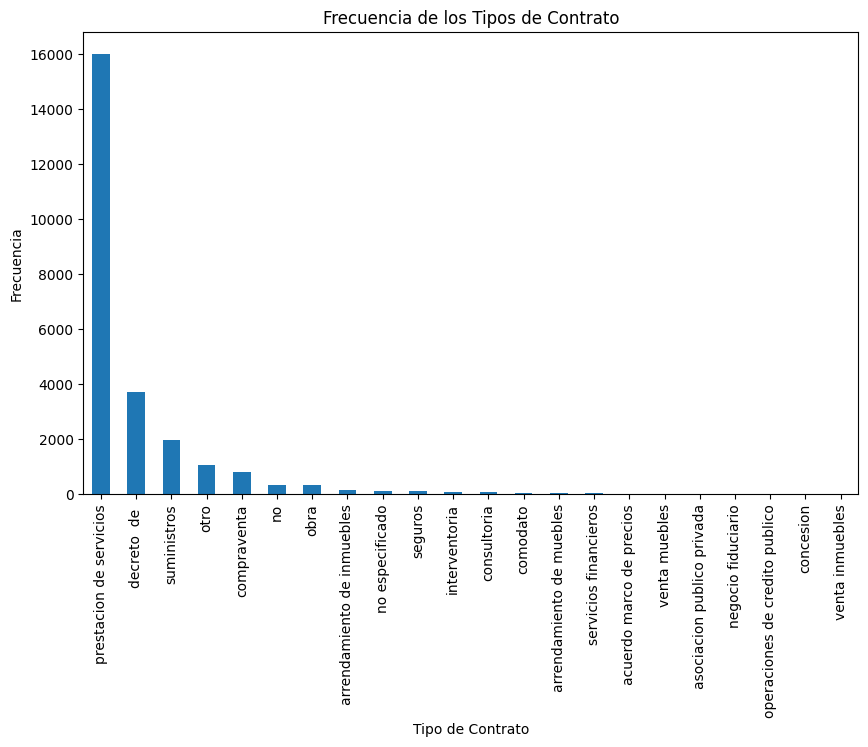

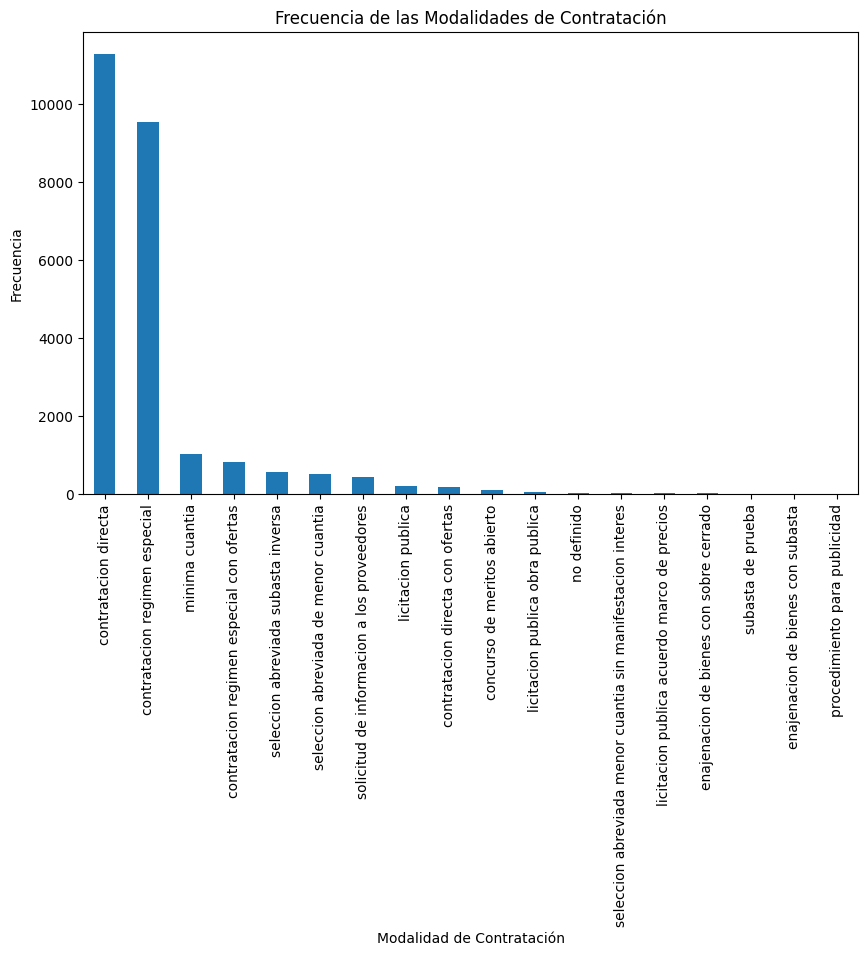

In [ ]:
# Distribución de categorías

# Frecuencia de los tipos de contrato
tipos_de_contrato = df_clean['tipo_de_contrato'].value_counts()
tipos_de_contrato.plot(kind='bar', figsize=(10, 6))
plt.title('Frecuencia de los Tipos de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frecuencia')
plt.show()

# Frecuencia de las modalidades de contratación
modalidades_de_contratacion = df_clean['modalidad_de_contratacion'].value_counts()
modalidades_de_contratacion.plot(kind='bar', figsize=(10, 6))
plt.title('Frecuencia de las Modalidades de Contratación')
plt.xlabel('Modalidad de Contratación')
plt.ylabel('Frecuencia')
plt.show()
